In [118]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## k-NN

In [119]:
df = pd.read_csv('./data/diabetes_data.csv')
df = utils.clean_data(df)
X_train, X_test, y_train, y_test = utils.split_data(df)

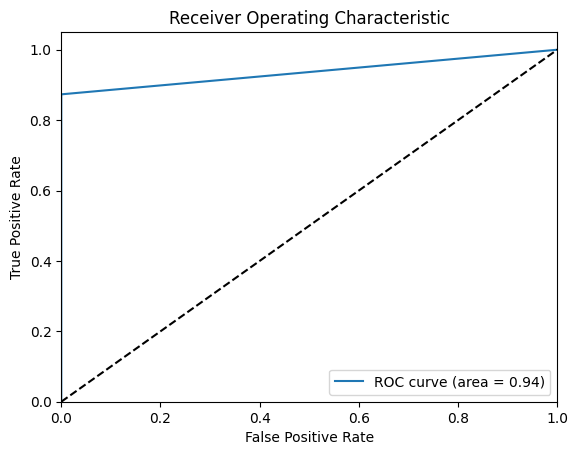

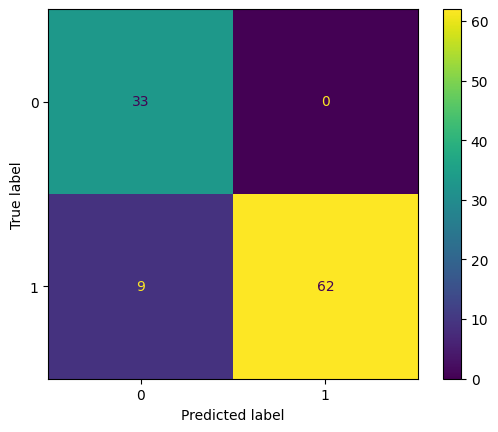

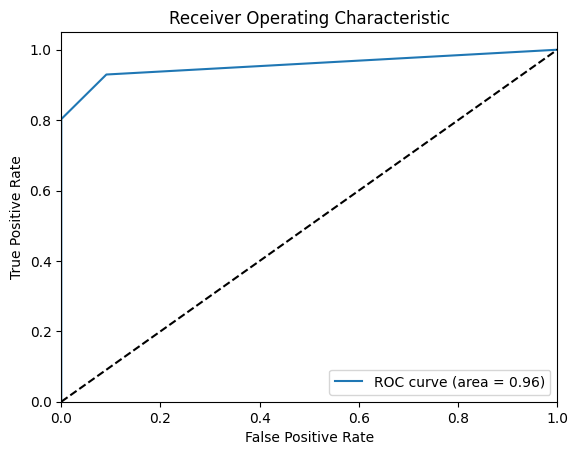

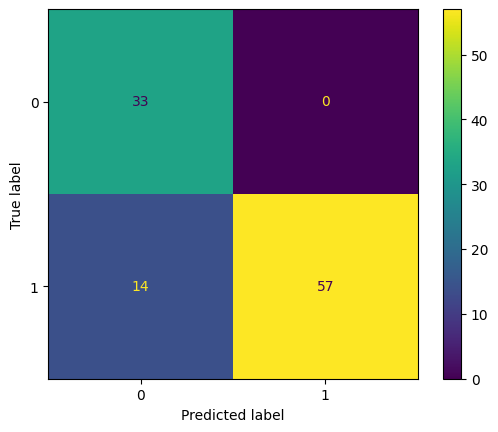

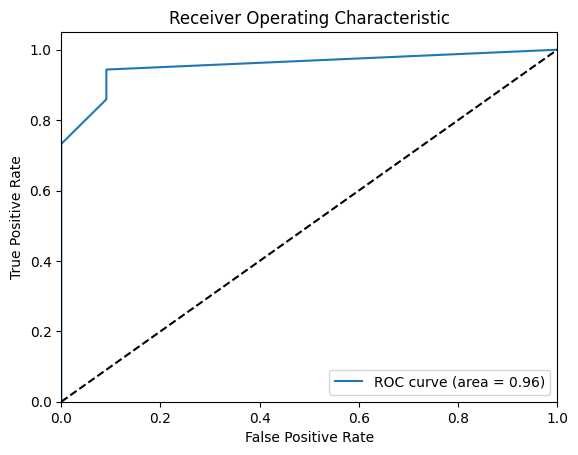

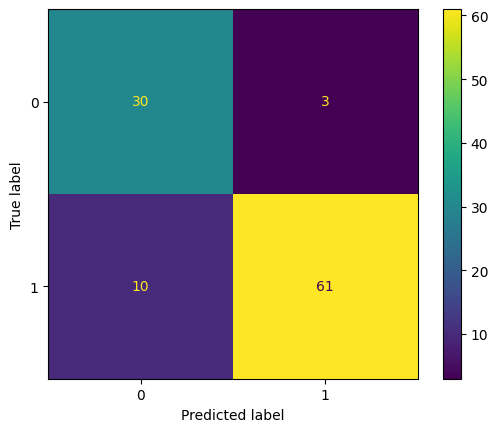

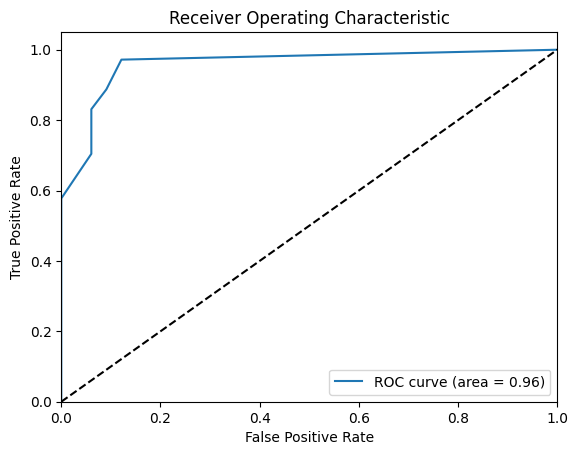

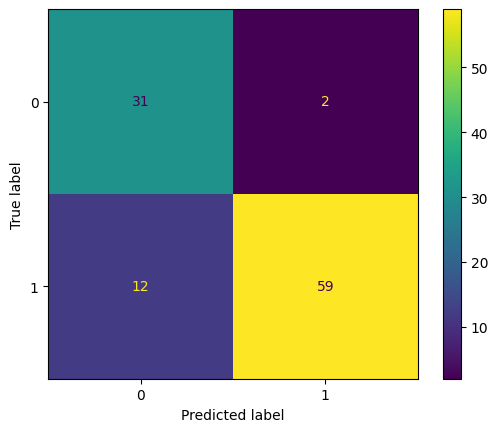

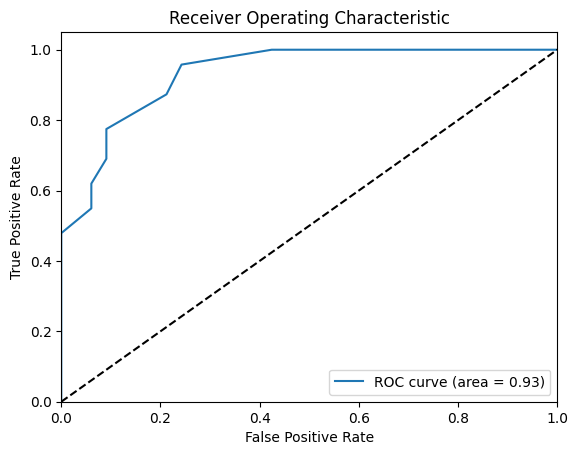

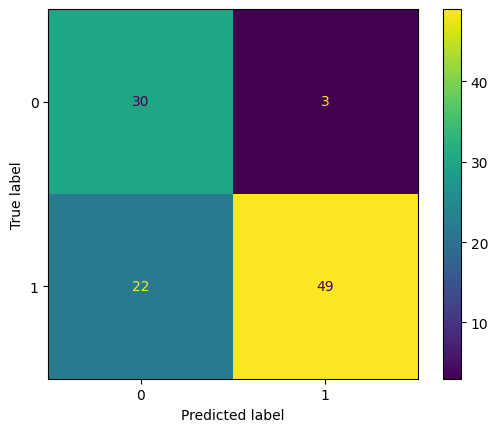

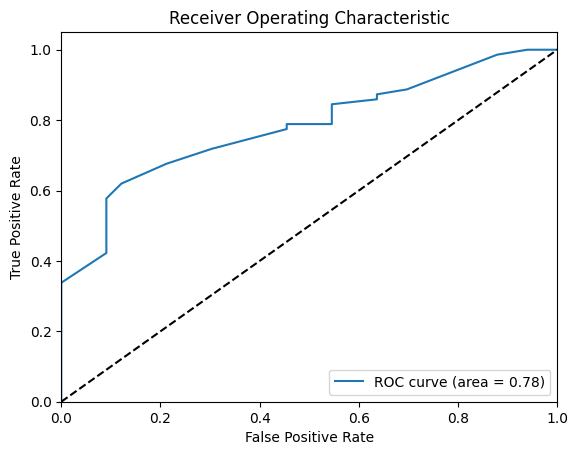

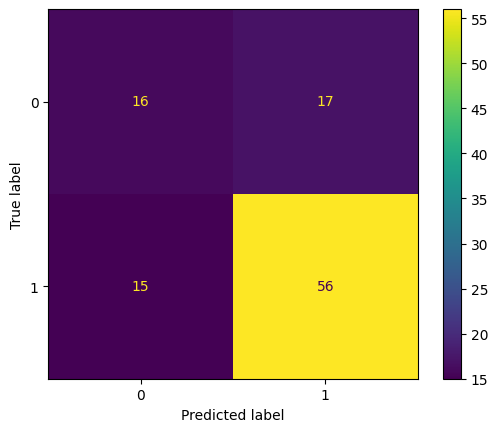

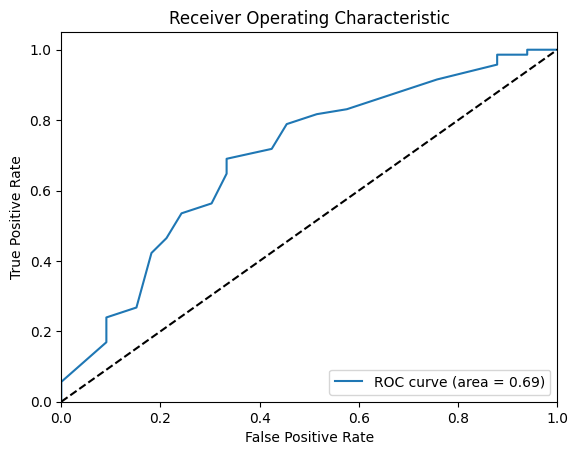

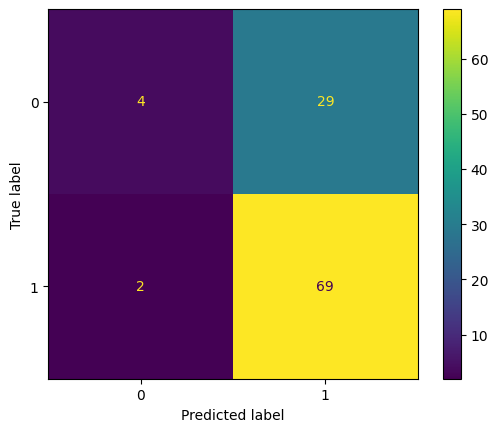

/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


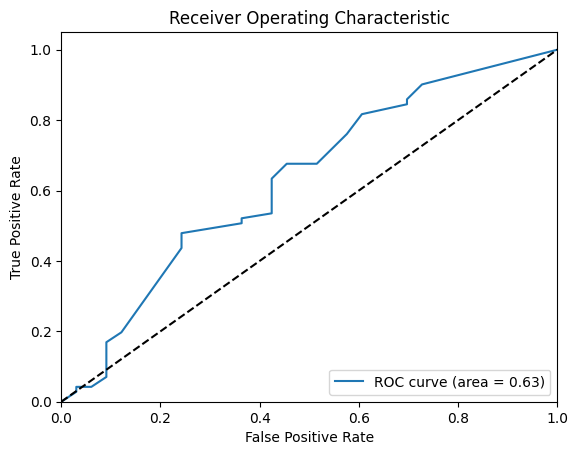

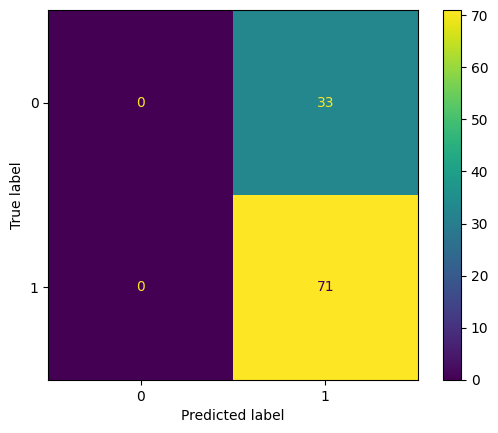

In [120]:
df_knn = pd.DataFrame()
for k in [1,2, 3, 5, 10,50,100,200]:
    model, metrics = utils.execute_knn(X_train, y_train, X_test, y_test, n_neighbors=k, plot_roc=True, plot_confusion_matrix=True)
    df_k =  pd.DataFrame([metrics])
    df_k['k'] = k
    df_knn = pd.concat([df_knn, df_k])

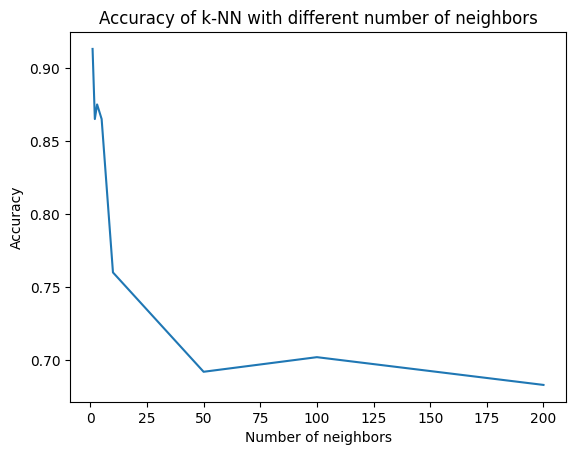

In [121]:
plt.plot(df_knn['k'], df_knn['accuracy'])
plt.title('Accuracy of k-NN with different number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.savefig('img/knn-accuracy.png')
plt.show()

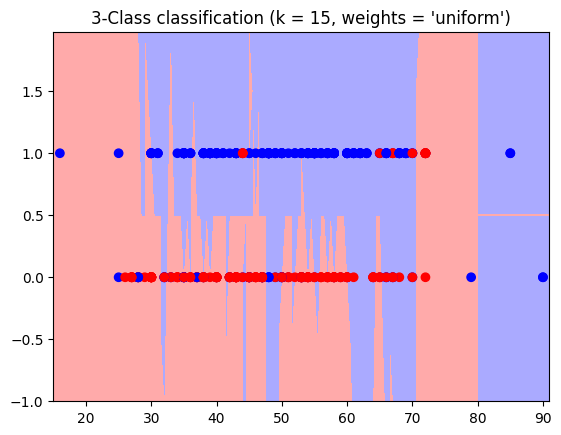

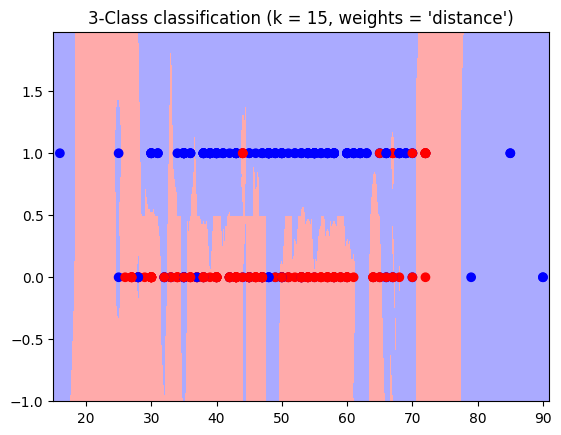

In [44]:
### This code comes from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib, 
### but it does not work well on my data, as features are binary, boundaries are not well painted for that reason.
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
# iris = datasets.load_iris()
X = df[['age', 'polyuria']].values  # Modify with your selected features
y = df['class'].values


h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# Decision Tree

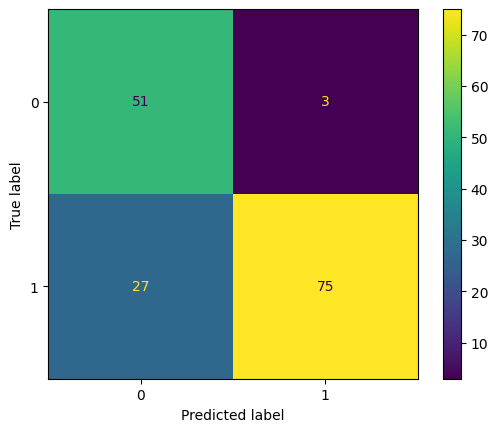

{'accuracy': 0.808, 'precision': 0.855, 'recall': 0.808, 'f1_score': 0.812, 'roc_auc': 0.844}


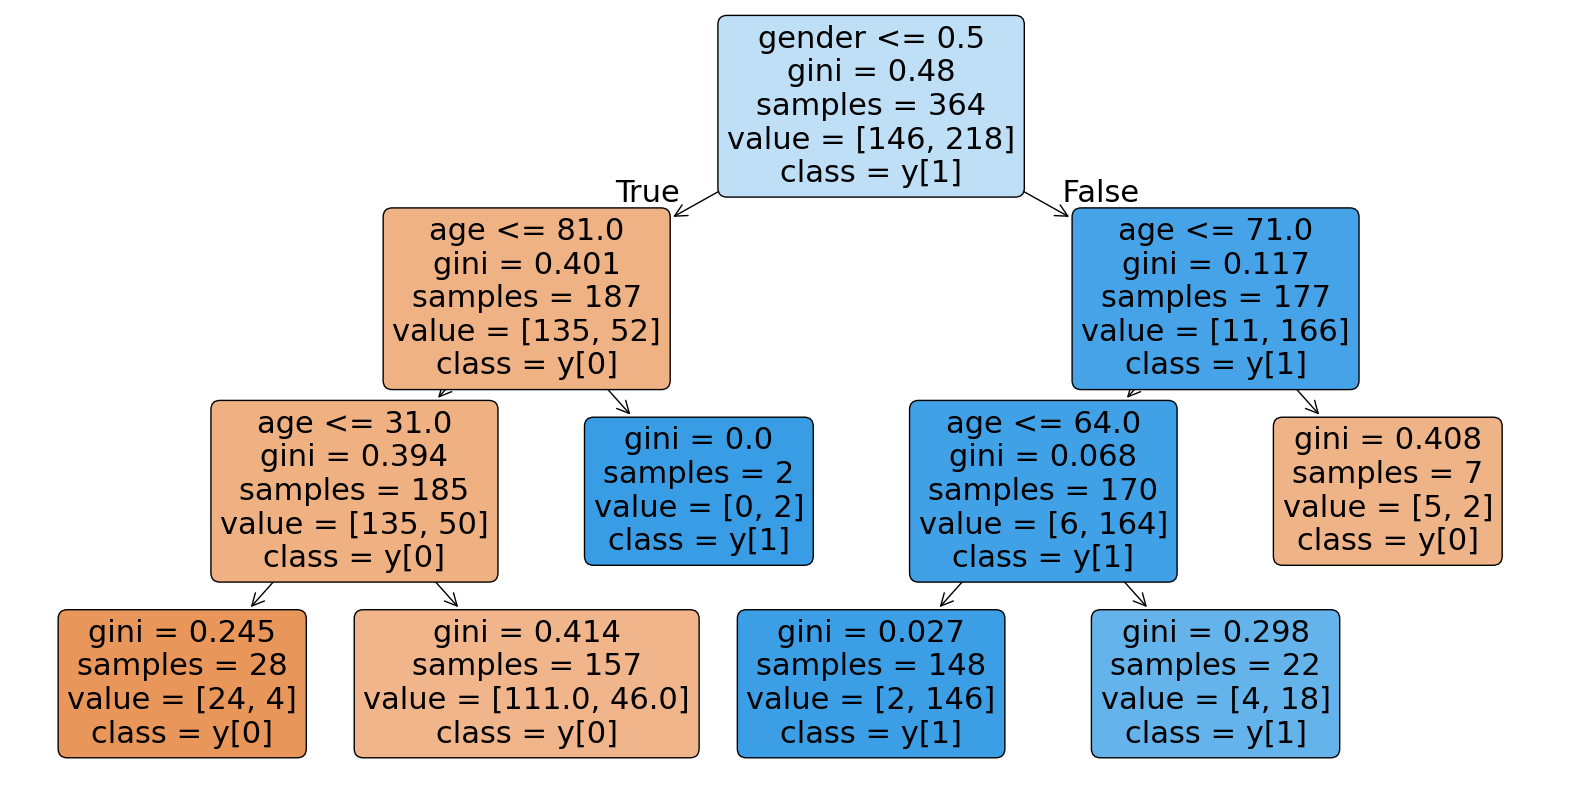

In [55]:
tree, metrics = utils.execute_decision_tree(X_train, y_train, X_test, y_test, max_depth=3, plot_roc=False, plot_confusion_matrix=True)
print(metrics)
utils.plot_decision_tree(tree, df.columns)

## SVC

Evaluating SVM with C=0.1, kernel=linear...


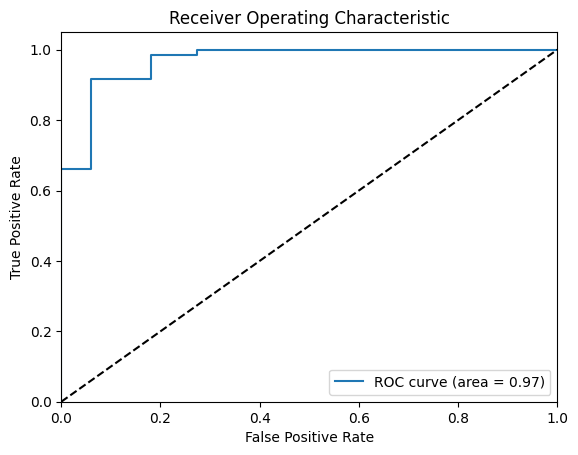

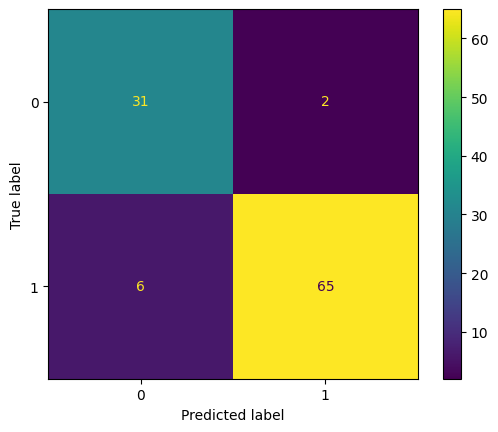

Evaluating SVM with C=0.1, kernel=rbf...


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


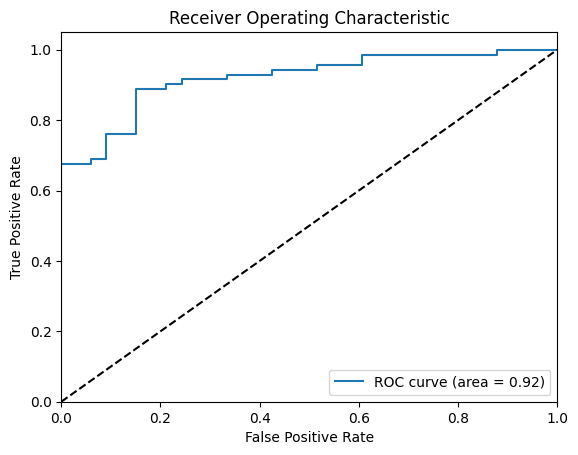

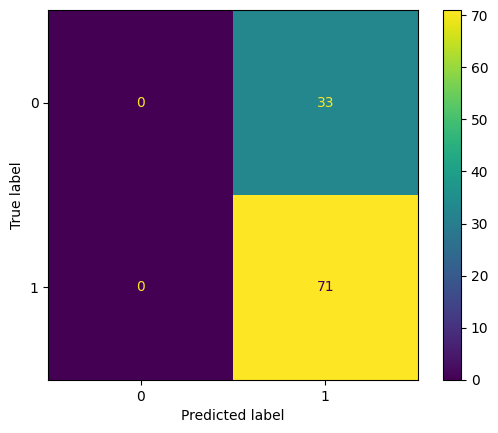

Evaluating SVM with C=0.1, kernel=poly...


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


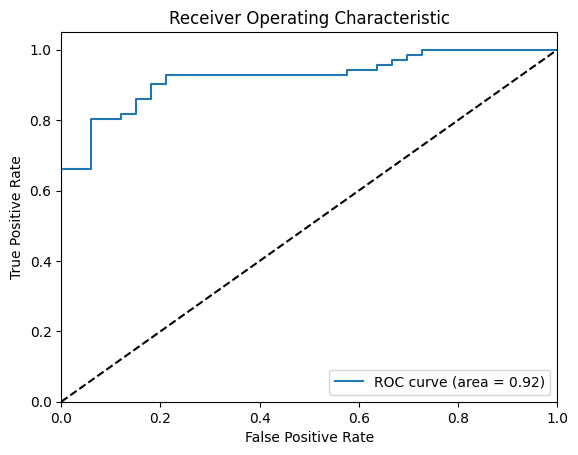

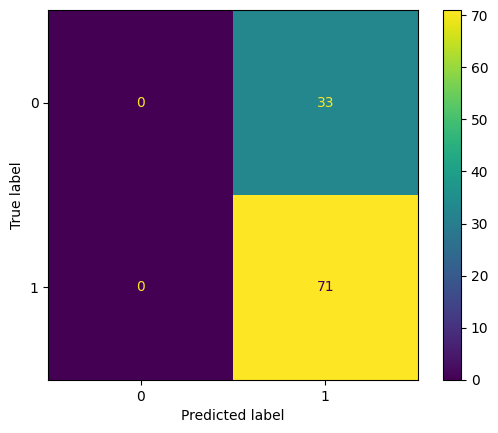

Evaluating SVM with C=1, kernel=linear...


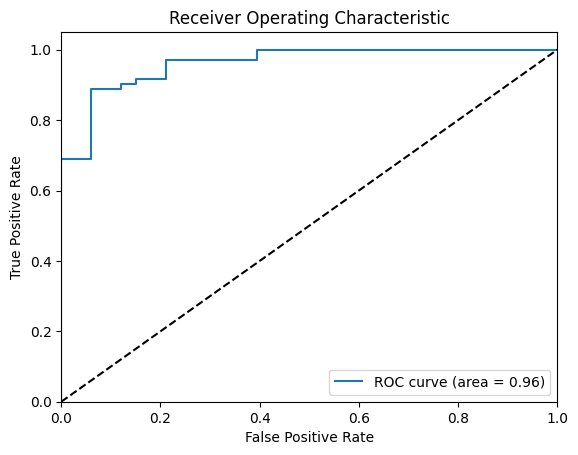

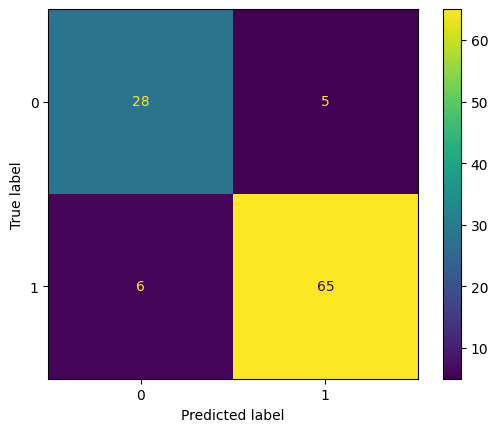

Evaluating SVM with C=1, kernel=rbf...


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


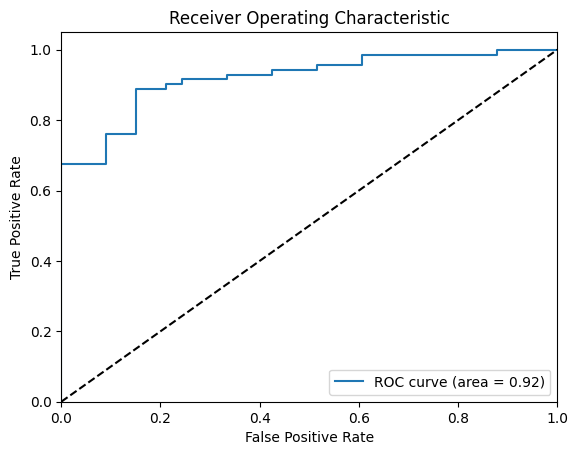

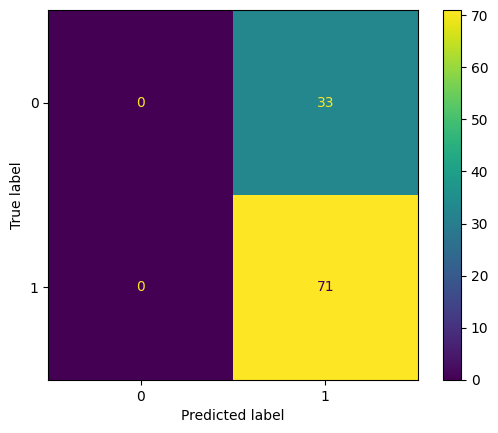

Evaluating SVM with C=1, kernel=poly...


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


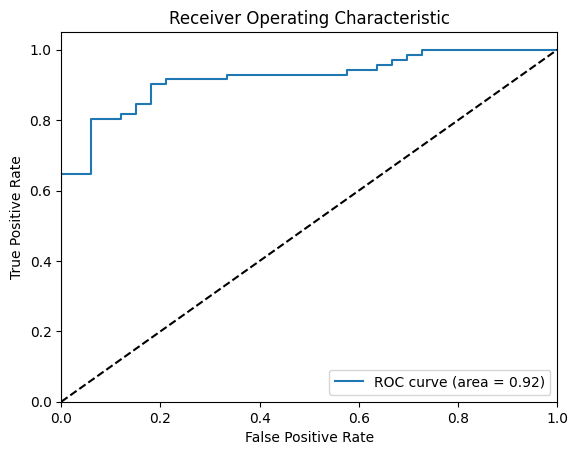

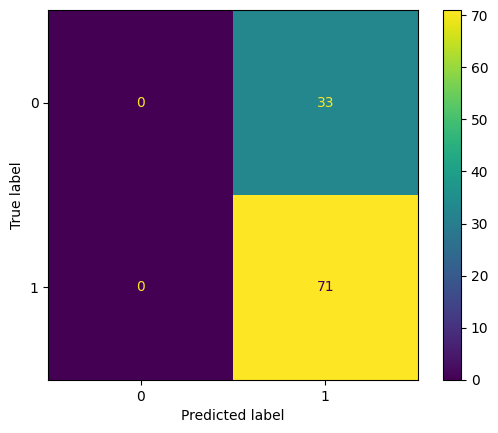

Evaluating SVM with C=10, kernel=linear...


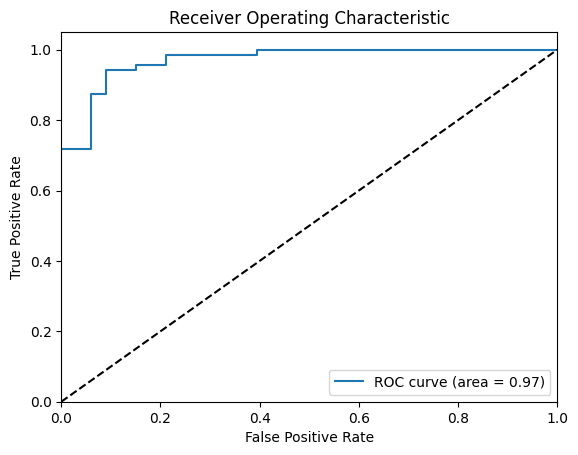

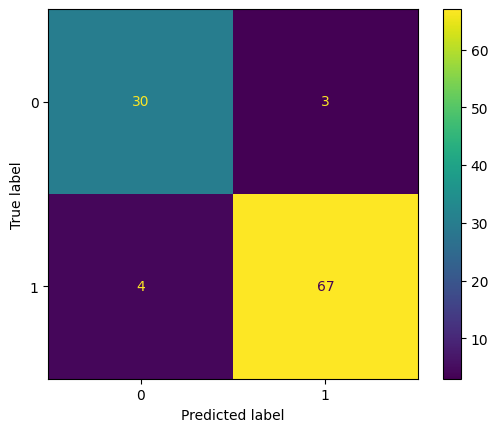

Evaluating SVM with C=10, kernel=rbf...


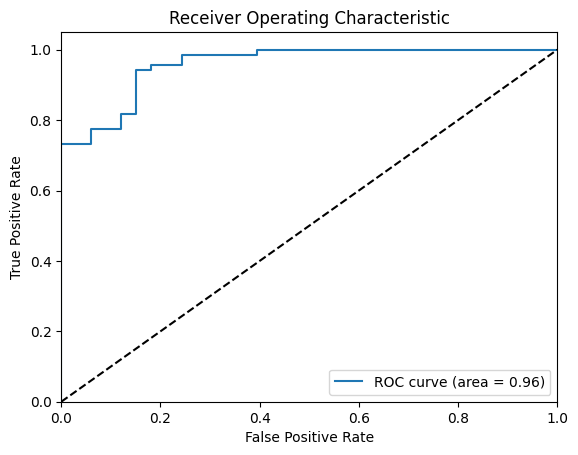

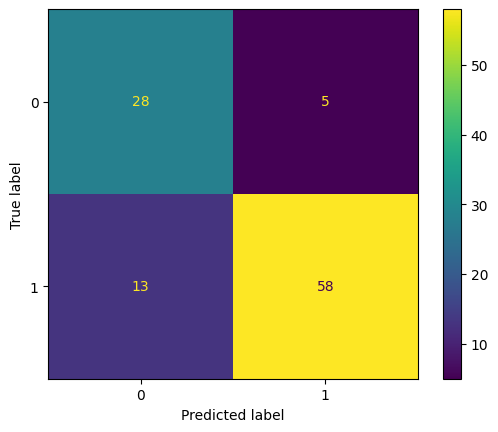

Evaluating SVM with C=10, kernel=poly...


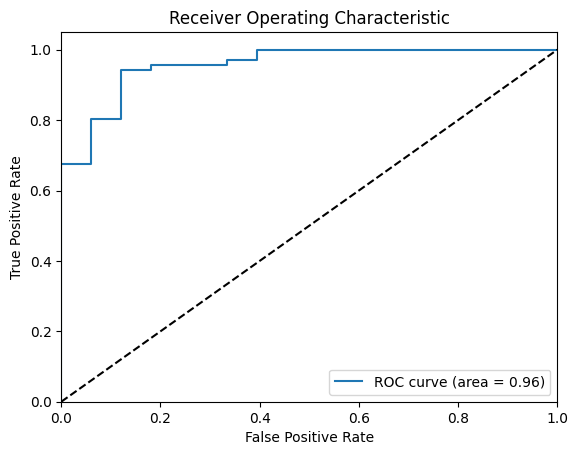

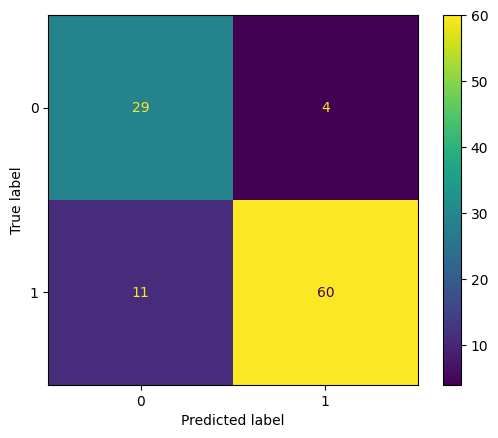

Evaluating SVM with C=50, kernel=linear...


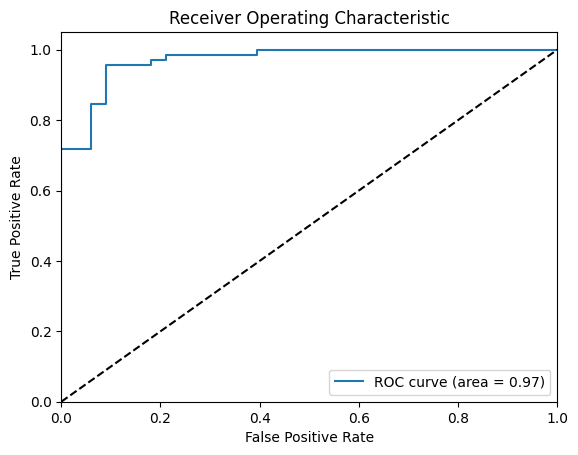

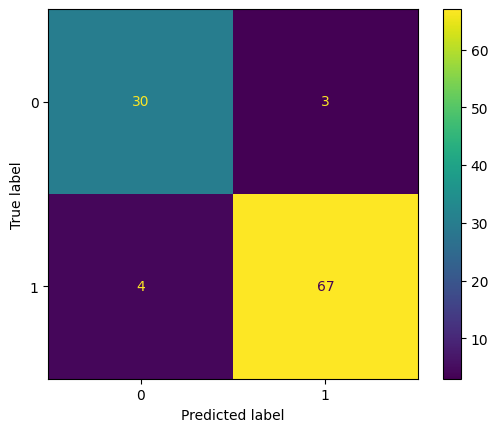

Evaluating SVM with C=50, kernel=rbf...


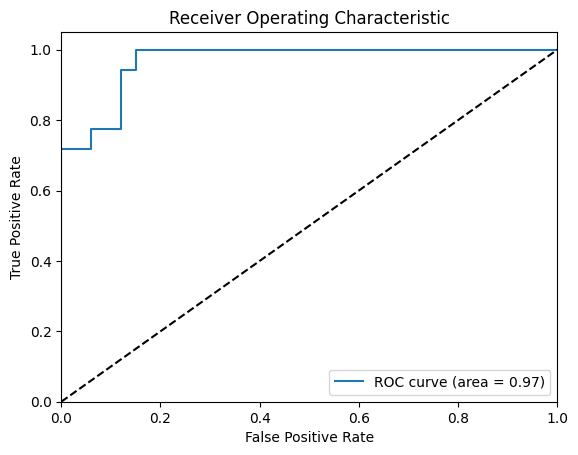

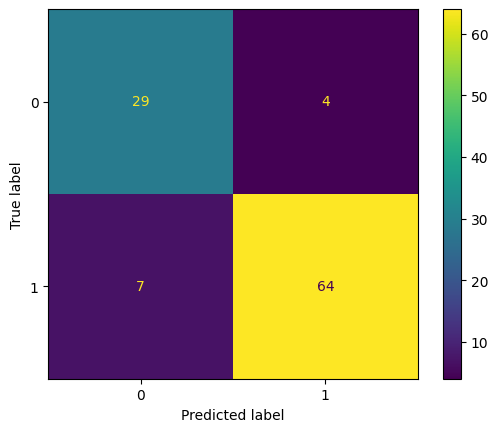

Evaluating SVM with C=50, kernel=poly...


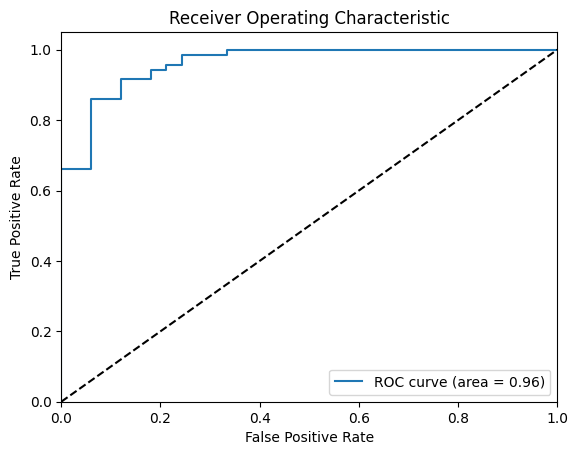

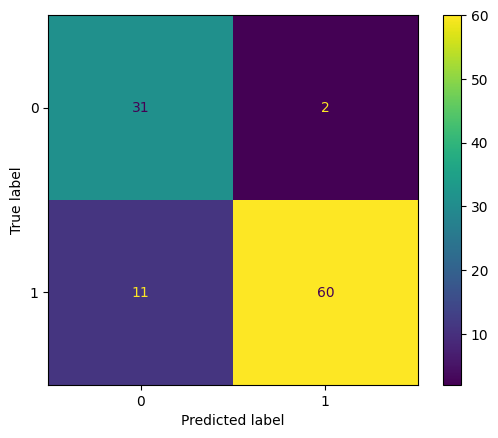

,C,kernel,accuracy,precision,recall,f1_score,roc_auc
0,0.1,linear,0.923,0.928,0.923,0.924,0.968
1,0.1,rbf,0.683,0.466,0.683,0.554,0.920
2,0.1,poly,0.683,0.466,0.683,0.554,0.923
3,1.0,linear,0.894,0.895,0.894,0.895,0.961
4,1.0,rbf,0.683,0.466,0.683,0.554,0.919
5,1.0,poly,0.683,0.466,0.683,0.554,0.920
6,10.0,linear,0.933,0.933,0.933,0.933,0.971
7,10.0,rbf,0.827,0.845,0.827,0.831,0.958
8,10.0,poly,0.856,0.870,0.856,0.859,0.957
9,50.0,linear,0.933,0.933,0.933,0.933,0.971


In [68]:
df = pd.read_csv('./data/diabetes_data.csv')
df = utils.clean_data(df)
X_train, X_test, y_train, y_test = utils.split_data(df)

from sklearn.svm import SVC
C_values=[0.1, 1, 10, 50]
kernels=['linear', 'rbf', 'poly']
plot_roc=True
plot_confusion_matrix=True
results = []
    
for c in C_values:
    for kernel in kernels:
            print(f"Evaluating SVM with C={c}, kernel={kernel}...")
            model, metrics = utils.execute_svm(X_train, y_train, X_test, y_test, C=c, kernel=kernel, plot_roc=plot_roc, plot_confusion_matrix=plot_confusion_matrix)
            
            results.append({
                'C': c,
                'kernel': kernel,
                **metrics
            })

results_svc = pd.DataFrame(results)
results_svc


## Rule Induction

In [112]:
import wittgenstein as lw

ripper_clf = lw.RIPPER() 
ripper_clf.fit(X_train, y_train) 
ripper_clf
ripper_df = pd.DataFrame([utils.evaluate_model(ripper_clf, X_test, y_test)])

In [117]:
ripper_clf.out_model()

[[polydipsia=1 ^ polyuria=1] V
[gender=1 ^ alopecia=0 ^ visual_blurring=1] V
[polyuria=1 ^ visual_blurring=0 ^ obesity=0] V
[polydipsia=1 ^ sudden_weight_loss=1] V
[irritability=1 ^ genital_thrush=1] V
[gender=1 ^ polyphagia=1] V
[polydipsia=1 ^ itching=0] V
[age=36.0-40.0 ^ polyuria=1] V
[weakness=1 ^ alopecia=0 ^ age=40.0-45.0] V
[age=36.0-40.0 ^ weakness=1] V
[age=55.0-58.0 ^ partial_paresis=1] V
[polyuria=1 ^ itching=0]]
